# Network inference of categorical variables: non-sequential data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg
from sklearn.preprocessing import OneHotEncoder
import fem
%matplotlib inline

import inference

In [2]:
# setting parameter:
np.random.seed(1)

n = 20 # number of positions
m = 5 # number of values at each position
l = int(4*((n*m)**2)) # number of samples
g = 2.
nm = n*m

In [3]:
w_actual = inference.generate_interactions(n,m,g)

In [4]:
h0_actual = np.zeros(nm)

In [5]:
x = inference.generate_sequences(w_actual,h0_actual,n,m,l)

In [7]:
s_inverse = np.argmax(x.reshape(-1,m),axis=1).reshape(-1,n)

In [8]:
y = (s_inverse.T).copy()

In [9]:
model = fem.discrete.model()
x1, x2 = y[:, :-1], y[:, 1:]
model.fit(x1, x2)

In [10]:
w_fit_flat = np.hstack([wi for wi in model.w.itervalues()]).flatten()

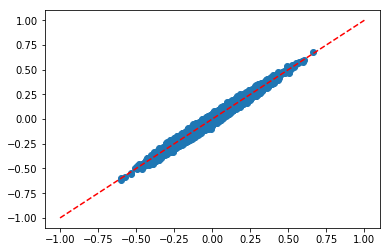

In [12]:
plt.scatter(w_actual,w_fit_flat.reshape(nm,nm))
plt.plot([-1.0,1.0],[-1.0,1.0],'r--')
plt.show()